---

## 📘 Introduction
Welcome to the **Development Waste Project**! This project aims to explore innovative solutions to waste management and sustainability. Throughout this notebook, we will find step-by-step instructions, code implementations, and detailed explanations to help us understand the processes involved.

---

## 🛠️ Project Overview
In this project, we will discuss:

1. Data Preparation and Analysis for Garbage Classification
2. Model Building and Evaluation of Vision Transformer with ResNet Backbone

---

<p style="font-size: 16px; color: #333;">Let's start by loading necessary libraries and setting up our environment.</p>

<center>
    <img src="/model/HR-ViT.png" style="width: 100%; height: auto;" />
</center>


In [1]:
# Check TensorFlow Installation:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.10.1


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import keras
print(keras.__version__)

2.10.0


# <div style="text-align: center; color: #4A90E2;">Data Preparation and Analysis for Garbage Classification</div>

## 📦 Import Libraries for Data Collection
To get started, we need to import the necessary libraries that will assist us in building the model, preprocessing data, and evaluating the results.



In [1]:
import os
from PIL import Image
import matplotlib.image as mpimg

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


---

## 📥 Data Collection
### About the Dataset
The data for this project has been sourced from two repositories on Kaggle:

- **6-Class Dataset**: Contains categories `[trash, glass, plastic, organic, paper, cardboard]`. 
  - [Dataset Link](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification)
  
- **12-Class Dataset**: Encompasses additional categories including `[battery, biological, white-glass, brown-glass, cardboard, clothes, green-glass, metal, paper, plastic, shoes, trash]`.
  - [Dataset Link](https://www.kaggle.com/datasets/mostafaabla/garbage-classification)

#### 📌 Note:
The class **`trash`** has been excluded from our dataset as it interferes with other categories, making classification challenging. It typically includes items like plastic bags and food, causing ambiguity with the **`plastic`** and **`organic`** classes.

---

## 🖼️ Sample Images from the Dataset
Let's visualize some sample images from the **`trash`** directory to understand the data we are working with.



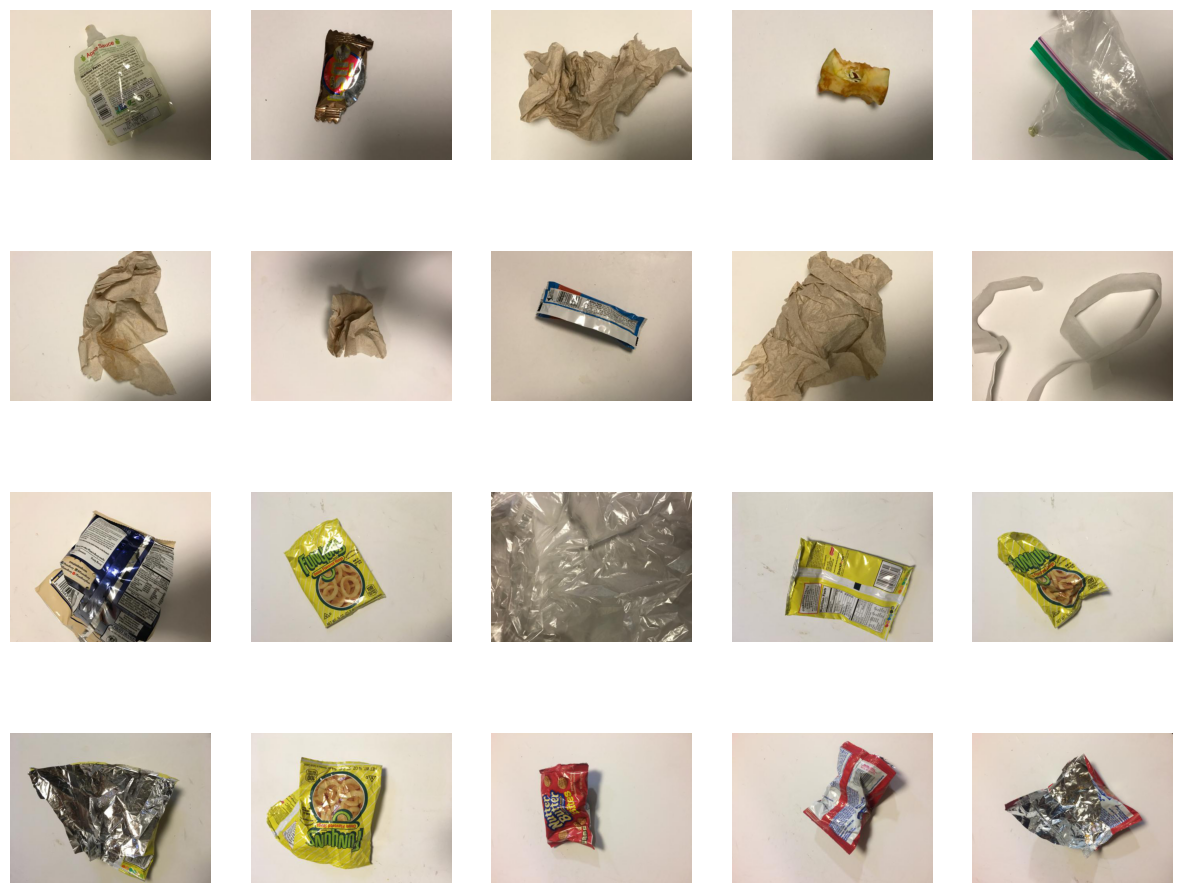

In [2]:
directory_path = "../garbage_classification_6_classes/Garbage classification/trash"
image_files = sorted([file for file in os.listdir(directory_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))])[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for i, image_file in enumerate(image_files):
    img = Image.open(os.path.join(directory_path, image_file))
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
plt.show()


---

Now, we'll proceed to visualize the **`glass`** class to further explore our dataset.



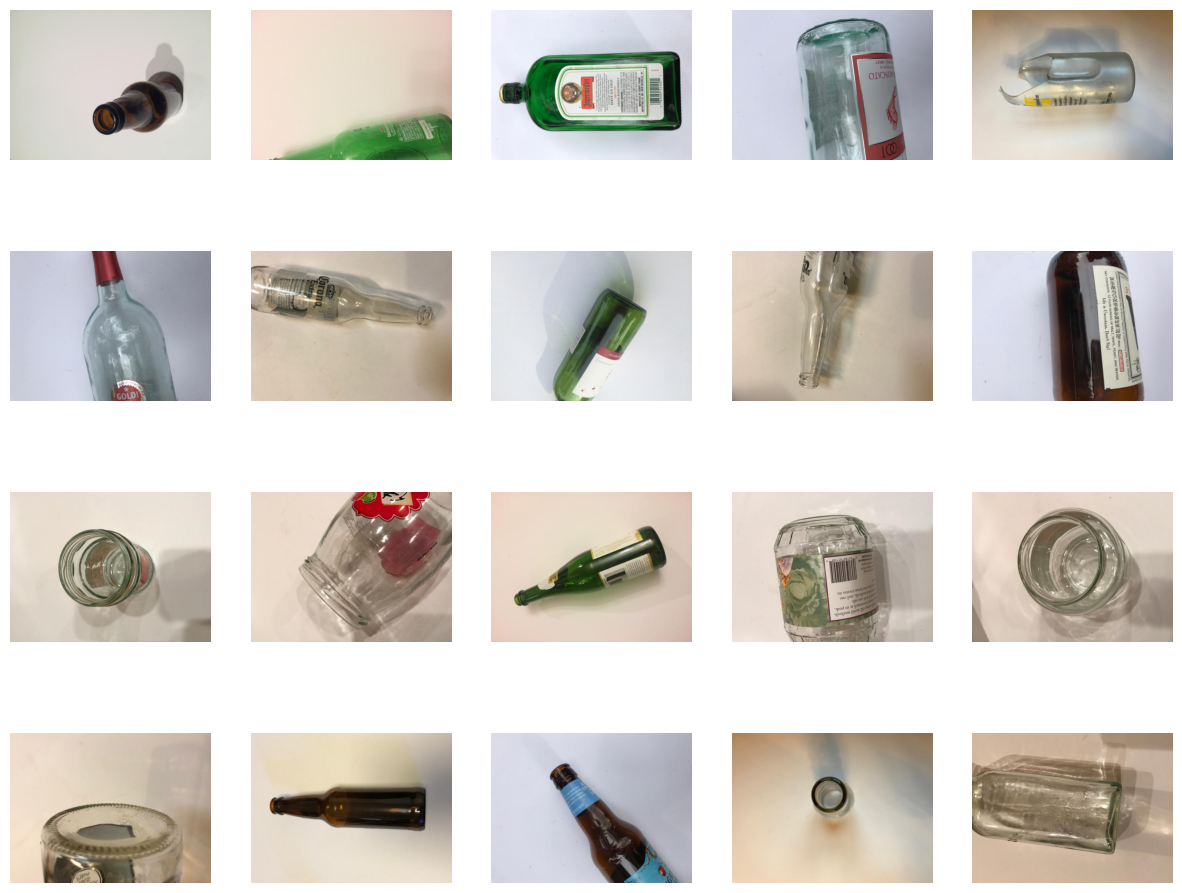

In [3]:
directory_path = "../garbage_classification_6_classes/Garbage classification/glass"
image_files = sorted([file for file in os.listdir(directory_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))])[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for i, image_file in enumerate(image_files):
    img = Image.open(os.path.join(directory_path, image_file))
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
plt.show()


### Data Imbalance and Class Modification
The **`trash`** class will now be replaced with the **`battery`** class from the 12-class dataset to avoid confusion during training. The class **`glass`** will retain images labeled as **`white-glass`** to maintain a focused dataset.

--- 

## 📊 Data Structure Analysis
Let's explore the folder structure and image count for further insights into our dataset.



### Dataset 6 Class

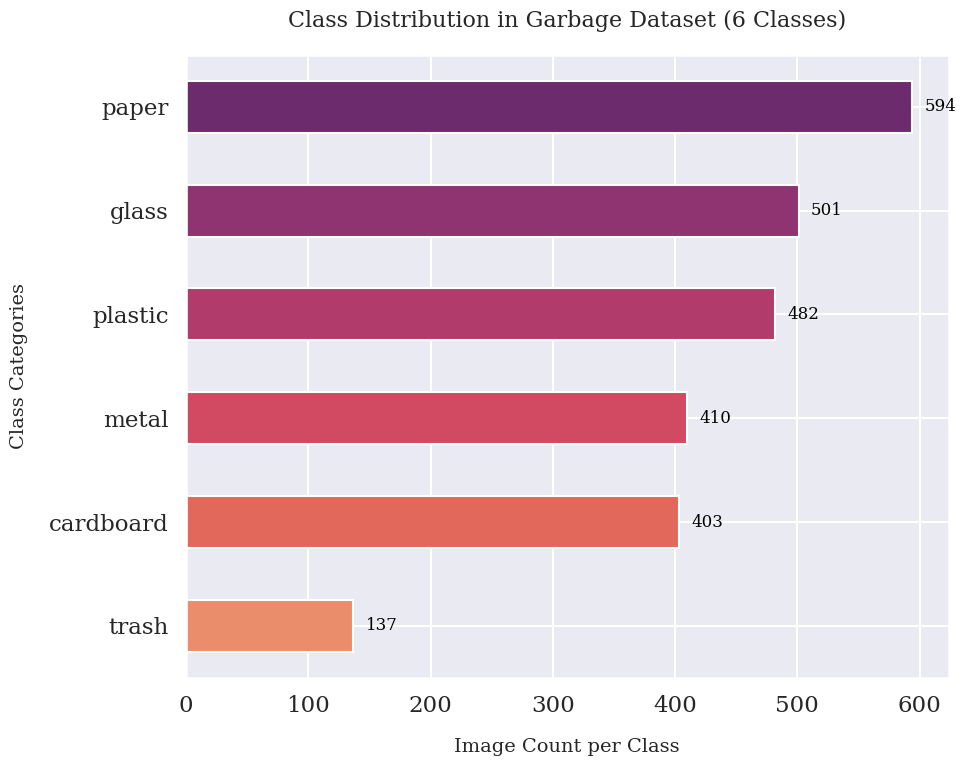

In [48]:
# Path to the root directory containing the garbage classification dataset
root = '../garbage_classification_6_classes/Garbage classification/'

# Dictionary to store image paths and corresponding class labels
data = {}

# Traverse the directory structure to gather image paths and their corresponding class labels
for i in os.listdir(root):
    folder_path = os.path.join(root, i)
    
    if os.path.isdir(folder_path):  # Process only directories
        for root_path, _, files in os.walk(folder_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Validating image files
                    data[os.path.join(root_path, file)] = i  # Mapping image path to class label

# Convert collected data into a DataFrame for easier analysis and plotting
data_df = pd.DataFrame(data.items(), columns=['path', 'class_'])

# Count the number of images in each class for further analysis
class_counts = data_df['class_'].value_counts()

# Set style and context for academic publication
sns.set_theme(style="darkgrid", context="talk", font="serif")

# Use a custom palette with distinct colors for visual clarity
palette = sns.color_palette("flare", len(class_counts))

# Plotting a horizontal bar chart to represent class distribution
plt.figure(figsize=(10, 8))  # Adjust size for academic presentation
ax = class_counts.sort_values(ascending=True).plot(
    kind='barh', 
    color=palette, 
)

# Title and axis labels for clarity
ax.set_title('Class Distribution in Garbage Dataset (6 Classes)', fontsize=16, pad=20)
ax.set_xlabel('Image Count per Class', fontsize=14, labelpad=15)
ax.set_ylabel('Class Categories', fontsize=14, labelpad=15)

# Adding data labels to each bar for clarity
for i in ax.patches:
    ax.text(i.get_width() + 10, i.get_y() + i.get_height() / 2, 
            str(i.get_width()), va='center', ha='left', fontsize=12, color='black')

# Adjust layout to ensure proper spacing
plt.tight_layout()

# Save the plot as a high-resolution image suitable for journal submission
plt.savefig('class_distribution_plot.png', dpi=300, bbox_inches='tight')

# Display the final plot
plt.show()


### Dataset 12 Class

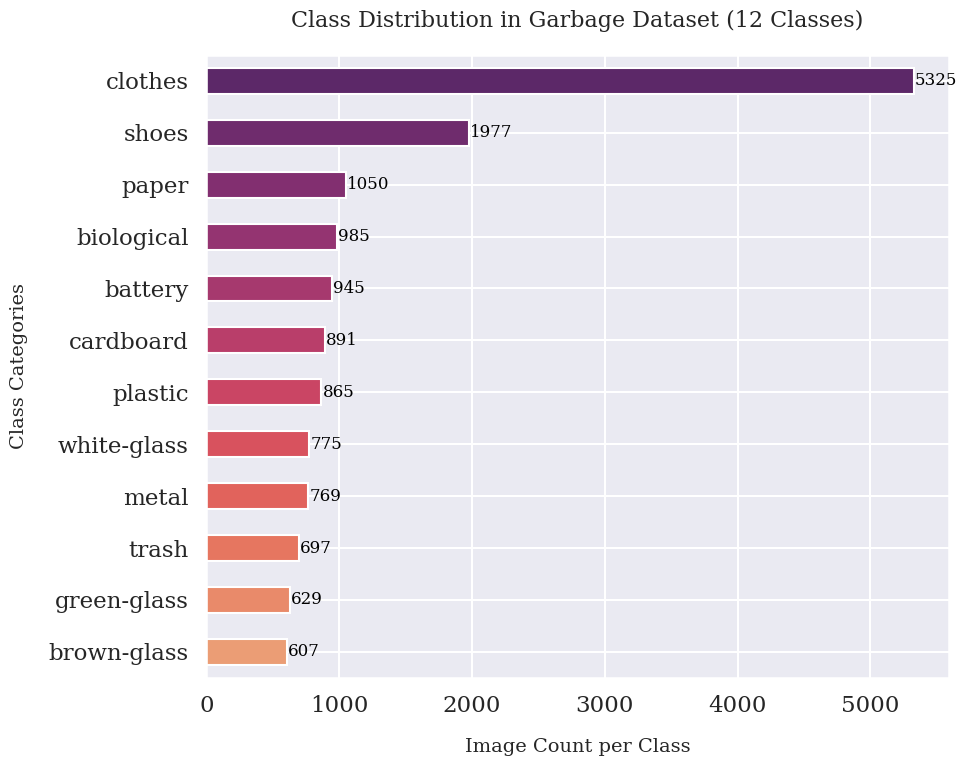

In [50]:
# Path to the root directory containing the garbage classification dataset
root = '../garbage_classification'

# Dictionary to store image paths and corresponding class labels
data = {}

# Traverse the directory structure to gather image paths and their corresponding class labels
for i in os.listdir(root):
    folder_path = os.path.join(root, i)
    
    if os.path.isdir(folder_path):  # Process only directories
        for root_path, _, files in os.walk(folder_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Validating image files
                    data[os.path.join(root_path, file)] = i  # Mapping image path to class label

# Convert collected data into a DataFrame for easier analysis and plotting
data_df = pd.DataFrame(data.items(), columns=['path', 'class_'])

# Count the number of images in each class for further analysis
class_counts = data_df['class_'].value_counts()

# Set style and context for academic publication
sns.set_theme(style="darkgrid", context="talk", font="serif")

# Use a custom palette with distinct colors for visual clarity
palette = sns.color_palette("flare", len(class_counts))

# Plotting a horizontal bar chart to represent class distribution
plt.figure(figsize=(10, 8))  # Adjust size for academic presentation
ax = class_counts.sort_values(ascending=True).plot(
    kind='barh', 
    color=palette,
)

# Title and axis labels for clarity
ax.set_title('Class Distribution in Garbage Dataset (12 Classes)', fontsize=16, pad=20)
ax.set_xlabel('Image Count per Class', fontsize=14, labelpad=15)
ax.set_ylabel('Class Categories', fontsize=14, labelpad=15)

# Adding data labels to each bar for clarity
for i in ax.patches:
    ax.text(i.get_width() + 10, i.get_y() + i.get_height() / 2, 
            str(i.get_width()), va='center', ha='left', fontsize=12, color='black')

# Adjust layout to ensure proper spacing
plt.tight_layout()

# Save the plot as a high-resolution image suitable for journal submission
plt.savefig('class_distribution_plot.png', dpi=300, bbox_inches='tight')

# Display the final plot
plt.show()



---

### Class Selection
The team decided to retain the **`white-glass`** class for the **`glass`** category, as it has sufficient images (775) essential for training, leading to a balanced dataset.

### Preparing the Dataset
The new dataset includes **6 classes**: **[metal, glass, organic, paper, battery, plastic]**. The selection criterion focuses on maintaining a balanced representation across all classes for effective model training.


---

### 🔄 Dataset Modification
Next, we will implement code to modify the dataset, removing unneeded classes and ensuring uniformity in the number of images across categories.



### Step 1: Import Required Libraries

In [9]:
import os
import shutil
import logging

> This code block imports the necessary libraries: `os` for file and directory operations, `shutil` for copying files, and `logging` for structured logging.

### Step 2: Set Up Logging and Paths

In [10]:
# Set up logging to track progress
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define paths for source, destination, and bonus datasets
original_path = '../garbage_classification_6_classes/Garbage classification'
bonus_data_path = '../garbage_classification/'
destination_path = '../modified_dataset/'

> - **Logging** is configured to show timestamps and log levels in the output, which helps in tracking the progress.
> - **Paths** are defined for the original dataset, bonus dataset, and the new location where the modified dataset will be stored.

### Step 3: Create Helper Functions

 #### a. Setup the Destination Directory:

In [11]:
# Function to set up the destination directory
def setup_destination_directory():
    """Ensure the destination directory is cleared and recreated."""
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    os.makedirs(destination_path, exist_ok=True)

> This function checks if the destination path exists, removes it if it does, and then creates it again.

 #### b. Function to Copy Images:

In [12]:
# Function to copy images to the new class folder
def copy_images_to_class(class_name, source_path, target_path, target_image_count):
    """Copy images from source to destination folder, limited by target image count."""
    os.makedirs(target_path, exist_ok=True)
    files_to_copy = os.listdir(source_path)[:target_image_count]
    
    for file_name in files_to_copy:
        file_path = os.path.join(source_path, file_name)
        shutil.copy(file_path, target_path)
    logging.info(f"Copied {len(files_to_copy)} images from {source_path} to {target_path}.")


> Copies up to the specified number of images (target_image_count) from the source directory to the target directory and logs the action.

 #### c. Fill Missing Images from Bonus Data:

In [13]:
# Function to fill missing images from the bonus dataset
def fill_missing_images(class_name, new_class_path, bonus_data_path, remaining_images):
    """Fill missing images for a class from bonus dataset if fewer images exist than target count."""
    bonus_class_path = os.path.join(bonus_data_path, class_name) if class_name != "glass" else os.path.join(bonus_data_path, "white-glass")
    
    if not os.path.exists(bonus_class_path):
        logging.warning(f"Bonus class path for {class_name} not found.")
        return remaining_images

    bonus_files = os.listdir(bonus_class_path)
    copied_names = set(os.listdir(new_class_path))
    
    for file_name in bonus_files:
        if remaining_images == 0:
            break
        new_file_name = file_name
        counter = 1
        while new_file_name in copied_names:
            base_name, extension = os.path.splitext(file_name)
            new_file_name = f"{class_name}_{counter}{extension}"
            counter += 1
        file_path = os.path.join(bonus_class_path, file_name)
        new_file_path = os.path.join(new_class_path, new_file_name)
        shutil.copy(file_path, new_file_path)
        copied_names.add(new_file_name)
        remaining_images -= 1
        logging.info(f"Copied {new_file_name} to {new_class_path}. Remaining images: {remaining_images}")
    
    return remaining_images

> - This function ensures that if a class has fewer images than the target, it fills the missing images by copying them from the bonus data.
> - It handles name conflicts by appending a counter to the filenames.

 #### d. Modify Dataset:

In [14]:
# Main function to modify the dataset
def modify_dataset(classes_to_remove, new_classes, target_image_count):
    """Modify the dataset by removing specific classes and adding new classes from bonus data."""
    setup_destination_directory()
    
    # Process the original dataset
    for class_name in os.listdir(original_path):
        class_path = os.path.join(original_path, class_name)

        if class_name in classes_to_remove:
            continue

        # Adjust class name if necessary
        new_class_name = new_classes[new_classes.index(class_name)] if class_name in new_classes else class_name
        new_class_path = os.path.join(destination_path, new_class_name)

        # Copy images from the original dataset
        copy_images_to_class(class_name, class_path, new_class_path, target_image_count)

        # If the class has fewer than target_image_count images, fill from bonus data
        if len(os.listdir(new_class_path)) < target_image_count:
            remaining_images = target_image_count - len(os.listdir(new_class_path))
            logging.info(f"{class_name} has {len(os.listdir(new_class_path))} images, missing {remaining_images}.")
            remaining_images = fill_missing_images(class_name, new_class_path, bonus_data_path, remaining_images)

    # Process the bonus dataset for battery and organic data
    for class_name in os.listdir(bonus_data_path):
        class_path = os.path.join(bonus_data_path, class_name)
        
        if class_name in new_classes:
            new_class_name = new_classes[new_classes.index(class_name)]
            new_class_name = "organic" if new_class_name == "biological" else new_class_name
            new_class_name = "glass" if new_class_name == "white-glass" else new_class_name

            new_class_path = os.path.join(destination_path, new_class_name)
            copy_images_to_class(class_name, class_path, new_class_path, target_image_count)

    logging.info("\nFINISH: Dataset modification complete.")

> This function drives the process of modifying the dataset by:
> - Removing specified classes.
> - Renaming classes based on new_classes.
> - Copying images from the original dataset to the new destination folder.
> - Filling missing images from the bonus dataset if required.

#### e. Print Dataset Distribution:

In [15]:
# Function to print the distribution of the modified dataset
def print_class_distribution():
    """Print the number of images in each class in the modified dataset."""
    for class_ in os.listdir(destination_path):
        count_class = len(os.listdir(os.path.join(destination_path, class_)))
        logging.info(f"{class_} has {count_class} images.")

> After processing, this function outputs the count of images in each class of the modified dataset.

### Step 4: Running the Dataset Modification

In [16]:
# Parameters for dataset modification
classes_to_remove = ['cardboard', 'trash', 'glass']  # Classes to remove from the original dataset
new_classes = ['battery', 'biological', 'white-glass']  # New classes to add from the bonus dataset
target_image_count = 775  # The target number of images per class

# Run the dataset modification
modify_dataset(classes_to_remove, new_classes, target_image_count)

# Print the final distribution of images
print_class_distribution()

2024-11-19 13:55:19,881 - INFO - Copied 410 images from ../garbage_classification_6_classes/Garbage classification\metal to ../modified_dataset/metal.
2024-11-19 13:55:19,882 - INFO - metal has 410 images, missing 365.
2024-11-19 13:55:19,884 - INFO - Copied metal_1.jpg to ../modified_dataset/metal. Remaining images: 364
2024-11-19 13:55:19,885 - INFO - Copied metal_2.jpg to ../modified_dataset/metal. Remaining images: 363
2024-11-19 13:55:19,887 - INFO - Copied metal_3.jpg to ../modified_dataset/metal. Remaining images: 362
2024-11-19 13:55:19,888 - INFO - Copied metal_4.jpg to ../modified_dataset/metal. Remaining images: 361
2024-11-19 13:55:19,890 - INFO - Copied metal_5.jpg to ../modified_dataset/metal. Remaining images: 360
2024-11-19 13:55:19,891 - INFO - Copied metal_6.jpg to ../modified_dataset/metal. Remaining images: 359
2024-11-19 13:55:19,894 - INFO - Copied metal_7.jpg to ../modified_dataset/metal. Remaining images: 358
2024-11-19 13:55:19,895 - INFO - Copied metal_8.jpg t

2024-11-19 13:55:19,996 - INFO - Copied metal_78.jpg to ../modified_dataset/metal. Remaining images: 287
2024-11-19 13:55:19,997 - INFO - Copied metal_79.jpg to ../modified_dataset/metal. Remaining images: 286
2024-11-19 13:55:19,999 - INFO - Copied metal_80.jpg to ../modified_dataset/metal. Remaining images: 285
2024-11-19 13:55:20,000 - INFO - Copied metal_81.jpg to ../modified_dataset/metal. Remaining images: 284
2024-11-19 13:55:20,001 - INFO - Copied metal_82.jpg to ../modified_dataset/metal. Remaining images: 283
2024-11-19 13:55:20,004 - INFO - Copied metal_83.jpg to ../modified_dataset/metal. Remaining images: 282
2024-11-19 13:55:20,005 - INFO - Copied metal_84.jpg to ../modified_dataset/metal. Remaining images: 281
2024-11-19 13:55:20,006 - INFO - Copied metal_85.jpg to ../modified_dataset/metal. Remaining images: 280
2024-11-19 13:55:20,007 - INFO - Copied metal_86.jpg to ../modified_dataset/metal. Remaining images: 279
2024-11-19 13:55:20,009 - INFO - Copied metal_87.jpg to

2024-11-19 13:55:20,165 - INFO - Copied metal_156.jpg to ../modified_dataset/metal. Remaining images: 209
2024-11-19 13:55:20,167 - INFO - Copied metal_157.jpg to ../modified_dataset/metal. Remaining images: 208
2024-11-19 13:55:20,169 - INFO - Copied metal_158.jpg to ../modified_dataset/metal. Remaining images: 207
2024-11-19 13:55:20,170 - INFO - Copied metal_159.jpg to ../modified_dataset/metal. Remaining images: 206
2024-11-19 13:55:20,172 - INFO - Copied metal_160.jpg to ../modified_dataset/metal. Remaining images: 205
2024-11-19 13:55:20,174 - INFO - Copied metal_161.jpg to ../modified_dataset/metal. Remaining images: 204
2024-11-19 13:55:20,177 - INFO - Copied metal_162.jpg to ../modified_dataset/metal. Remaining images: 203
2024-11-19 13:55:20,179 - INFO - Copied metal_163.jpg to ../modified_dataset/metal. Remaining images: 202
2024-11-19 13:55:20,180 - INFO - Copied metal_164.jpg to ../modified_dataset/metal. Remaining images: 201
2024-11-19 13:55:20,183 - INFO - Copied metal_

2024-11-19 13:55:20,305 - INFO - Copied metal_234.jpg to ../modified_dataset/metal. Remaining images: 131
2024-11-19 13:55:20,307 - INFO - Copied metal_235.jpg to ../modified_dataset/metal. Remaining images: 130
2024-11-19 13:55:20,310 - INFO - Copied metal_236.jpg to ../modified_dataset/metal. Remaining images: 129
2024-11-19 13:55:20,312 - INFO - Copied metal_237.jpg to ../modified_dataset/metal. Remaining images: 128
2024-11-19 13:55:20,314 - INFO - Copied metal_238.jpg to ../modified_dataset/metal. Remaining images: 127
2024-11-19 13:55:20,316 - INFO - Copied metal_239.jpg to ../modified_dataset/metal. Remaining images: 126
2024-11-19 13:55:20,319 - INFO - Copied metal_240.jpg to ../modified_dataset/metal. Remaining images: 125
2024-11-19 13:55:20,320 - INFO - Copied metal_241.jpg to ../modified_dataset/metal. Remaining images: 124
2024-11-19 13:55:20,322 - INFO - Copied metal_242.jpg to ../modified_dataset/metal. Remaining images: 123
2024-11-19 13:55:20,325 - INFO - Copied metal_

2024-11-19 13:55:20,450 - INFO - Copied metal_312.jpg to ../modified_dataset/metal. Remaining images: 53
2024-11-19 13:55:20,452 - INFO - Copied metal_313.jpg to ../modified_dataset/metal. Remaining images: 52
2024-11-19 13:55:20,453 - INFO - Copied metal_314.jpg to ../modified_dataset/metal. Remaining images: 51
2024-11-19 13:55:20,455 - INFO - Copied metal_315.jpg to ../modified_dataset/metal. Remaining images: 50
2024-11-19 13:55:20,457 - INFO - Copied metal_316.jpg to ../modified_dataset/metal. Remaining images: 49
2024-11-19 13:55:20,458 - INFO - Copied metal_317.jpg to ../modified_dataset/metal. Remaining images: 48
2024-11-19 13:55:20,460 - INFO - Copied metal_318.jpg to ../modified_dataset/metal. Remaining images: 47
2024-11-19 13:55:20,463 - INFO - Copied metal_319.jpg to ../modified_dataset/metal. Remaining images: 46
2024-11-19 13:55:20,464 - INFO - Copied metal_320.jpg to ../modified_dataset/metal. Remaining images: 45
2024-11-19 13:55:20,466 - INFO - Copied metal_321.jpg t

2024-11-19 13:55:21,083 - INFO - Copied paper1019.jpg to ../modified_dataset/paper. Remaining images: 157
2024-11-19 13:55:21,086 - INFO - Copied paper_5.jpg to ../modified_dataset/paper. Remaining images: 156
2024-11-19 13:55:21,087 - INFO - Copied paper1020.jpg to ../modified_dataset/paper. Remaining images: 155
2024-11-19 13:55:21,089 - INFO - Copied paper1021.jpg to ../modified_dataset/paper. Remaining images: 154
2024-11-19 13:55:21,090 - INFO - Copied paper1022.jpg to ../modified_dataset/paper. Remaining images: 153
2024-11-19 13:55:21,093 - INFO - Copied paper1023.jpg to ../modified_dataset/paper. Remaining images: 152
2024-11-19 13:55:21,095 - INFO - Copied paper1024.jpg to ../modified_dataset/paper. Remaining images: 151
2024-11-19 13:55:21,097 - INFO - Copied paper1025.jpg to ../modified_dataset/paper. Remaining images: 150
2024-11-19 13:55:21,099 - INFO - Copied paper1026.jpg to ../modified_dataset/paper. Remaining images: 149
2024-11-19 13:55:21,101 - INFO - Copied paper102

2024-11-19 13:55:21,231 - INFO - Copied paper_51.jpg to ../modified_dataset/paper. Remaining images: 79
2024-11-19 13:55:21,232 - INFO - Copied paper_52.jpg to ../modified_dataset/paper. Remaining images: 78
2024-11-19 13:55:21,234 - INFO - Copied paper_53.jpg to ../modified_dataset/paper. Remaining images: 77
2024-11-19 13:55:21,235 - INFO - Copied paper_54.jpg to ../modified_dataset/paper. Remaining images: 76
2024-11-19 13:55:21,237 - INFO - Copied paper_55.jpg to ../modified_dataset/paper. Remaining images: 75
2024-11-19 13:55:21,238 - INFO - Copied paper_56.jpg to ../modified_dataset/paper. Remaining images: 74
2024-11-19 13:55:21,239 - INFO - Copied paper_57.jpg to ../modified_dataset/paper. Remaining images: 73
2024-11-19 13:55:21,241 - INFO - Copied paper_58.jpg to ../modified_dataset/paper. Remaining images: 72
2024-11-19 13:55:21,242 - INFO - Copied paper_59.jpg to ../modified_dataset/paper. Remaining images: 71
2024-11-19 13:55:21,244 - INFO - Copied paper_60.jpg to ../modif

2024-11-19 13:55:21,359 - INFO - Copied paper_130.jpg to ../modified_dataset/paper. Remaining images: 0
2024-11-19 13:55:21,790 - INFO - Copied 482 images from ../garbage_classification_6_classes/Garbage classification\plastic to ../modified_dataset/plastic.
2024-11-19 13:55:21,791 - INFO - plastic has 482 images, missing 293.
2024-11-19 13:55:21,793 - INFO - Copied plastic_1.jpg to ../modified_dataset/plastic. Remaining images: 292
2024-11-19 13:55:21,795 - INFO - Copied plastic_2.jpg to ../modified_dataset/plastic. Remaining images: 291
2024-11-19 13:55:21,796 - INFO - Copied plastic_3.jpg to ../modified_dataset/plastic. Remaining images: 290
2024-11-19 13:55:21,799 - INFO - Copied plastic_4.jpg to ../modified_dataset/plastic. Remaining images: 289
2024-11-19 13:55:21,800 - INFO - Copied plastic_5.jpg to ../modified_dataset/plastic. Remaining images: 288
2024-11-19 13:55:21,801 - INFO - Copied plastic_6.jpg to ../modified_dataset/plastic. Remaining images: 287
2024-11-19 13:55:21,802

2024-11-19 13:55:21,902 - INFO - Copied plastic_74.jpg to ../modified_dataset/plastic. Remaining images: 219
2024-11-19 13:55:21,903 - INFO - Copied plastic_75.jpg to ../modified_dataset/plastic. Remaining images: 218
2024-11-19 13:55:21,905 - INFO - Copied plastic_76.jpg to ../modified_dataset/plastic. Remaining images: 217
2024-11-19 13:55:21,906 - INFO - Copied plastic_77.jpg to ../modified_dataset/plastic. Remaining images: 216
2024-11-19 13:55:21,909 - INFO - Copied plastic_78.jpg to ../modified_dataset/plastic. Remaining images: 215
2024-11-19 13:55:21,910 - INFO - Copied plastic_79.jpg to ../modified_dataset/plastic. Remaining images: 214
2024-11-19 13:55:21,911 - INFO - Copied plastic_80.jpg to ../modified_dataset/plastic. Remaining images: 213
2024-11-19 13:55:21,913 - INFO - Copied plastic_81.jpg to ../modified_dataset/plastic. Remaining images: 212
2024-11-19 13:55:21,915 - INFO - Copied plastic_82.jpg to ../modified_dataset/plastic. Remaining images: 211
2024-11-19 13:55:21

2024-11-19 13:55:22,030 - INFO - Copied plastic_149.jpg to ../modified_dataset/plastic. Remaining images: 144
2024-11-19 13:55:22,032 - INFO - Copied plastic_150.jpg to ../modified_dataset/plastic. Remaining images: 143
2024-11-19 13:55:22,033 - INFO - Copied plastic_151.jpg to ../modified_dataset/plastic. Remaining images: 142
2024-11-19 13:55:22,036 - INFO - Copied plastic_152.jpg to ../modified_dataset/plastic. Remaining images: 141
2024-11-19 13:55:22,038 - INFO - Copied plastic_153.jpg to ../modified_dataset/plastic. Remaining images: 140
2024-11-19 13:55:22,040 - INFO - Copied plastic_154.jpg to ../modified_dataset/plastic. Remaining images: 139
2024-11-19 13:55:22,042 - INFO - Copied plastic_155.jpg to ../modified_dataset/plastic. Remaining images: 138
2024-11-19 13:55:22,044 - INFO - Copied plastic_156.jpg to ../modified_dataset/plastic. Remaining images: 137
2024-11-19 13:55:22,046 - INFO - Copied plastic_157.jpg to ../modified_dataset/plastic. Remaining images: 136
2024-11-19

2024-11-19 13:55:22,168 - INFO - Copied plastic_224.jpg to ../modified_dataset/plastic. Remaining images: 69
2024-11-19 13:55:22,171 - INFO - Copied plastic_225.jpg to ../modified_dataset/plastic. Remaining images: 68
2024-11-19 13:55:22,173 - INFO - Copied plastic_226.jpg to ../modified_dataset/plastic. Remaining images: 67
2024-11-19 13:55:22,176 - INFO - Copied plastic_227.jpg to ../modified_dataset/plastic. Remaining images: 66
2024-11-19 13:55:22,180 - INFO - Copied plastic_228.jpg to ../modified_dataset/plastic. Remaining images: 65
2024-11-19 13:55:22,183 - INFO - Copied plastic_229.jpg to ../modified_dataset/plastic. Remaining images: 64
2024-11-19 13:55:22,186 - INFO - Copied plastic_230.jpg to ../modified_dataset/plastic. Remaining images: 63
2024-11-19 13:55:22,189 - INFO - Copied plastic_231.jpg to ../modified_dataset/plastic. Remaining images: 62
2024-11-19 13:55:22,192 - INFO - Copied plastic_232.jpg to ../modified_dataset/plastic. Remaining images: 61
2024-11-19 13:55:22

2024-11-19 13:55:23,992 - INFO - organic has 775 images.
2024-11-19 13:55:23,993 - INFO - paper has 775 images.
2024-11-19 13:55:23,994 - INFO - plastic has 775 images.


---

## 🕵️‍♂️ Exploratory Data Analysis
### Overview of Classes
We will conduct a detailed analysis of our modified dataset, focusing on image counts to ensure it meets our training requirements.

In [4]:
data_path = '../modified_dataset'
data_classes = os.listdir(data_path)
data_classes

['battery', 'glass', 'metal', 'organic', 'paper', 'plastic']

### Image Count Verification
Let's confirm the number of images for each class.

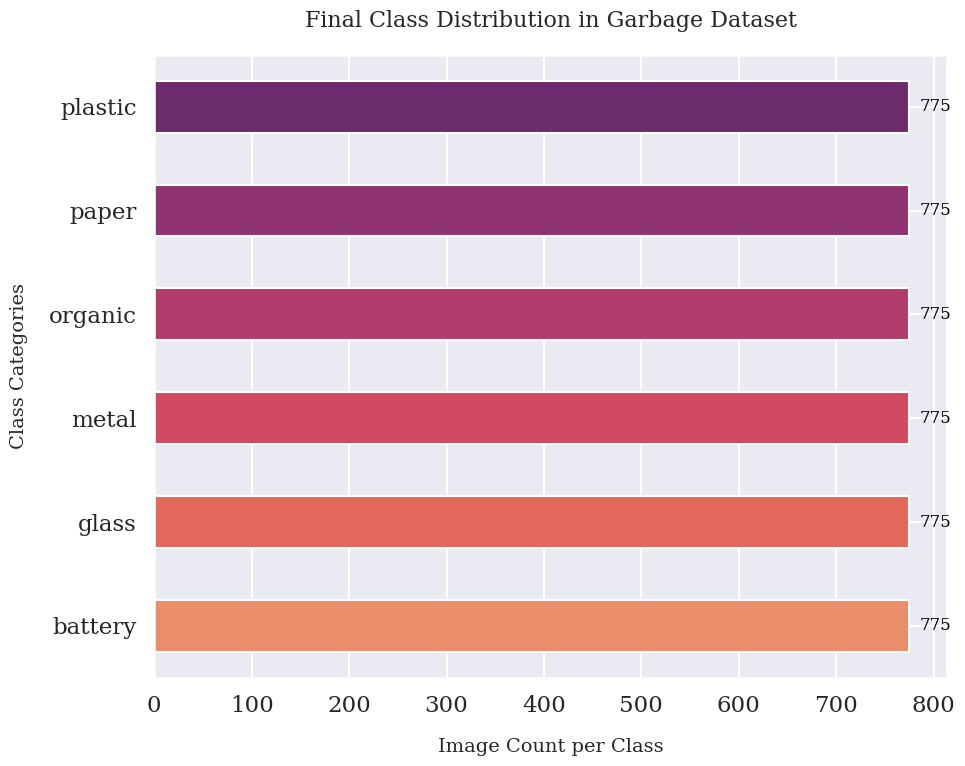

In [59]:
# Path to the root directory containing the garbage classification dataset
root = '../modified_dataset'

# Dictionary to store image paths and corresponding class labels
data = {}

# Traverse the directory structure to gather image paths and their corresponding class labels
for i in os.listdir(root):
    folder_path = os.path.join(root, i)
    
    if os.path.isdir(folder_path):  # Process only directories
        for root_path, _, files in os.walk(folder_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Validating image files
                    data[os.path.join(root_path, file)] = i  # Mapping image path to class label

# Convert collected data into a DataFrame for easier analysis and plotting
data_df = pd.DataFrame(data.items(), columns=['path', 'class_'])

# Count the number of images in each class for further analysis
class_counts = data_df['class_'].value_counts()

# Set style and context for academic publication
sns.set_theme(style="darkgrid", context="talk", font="serif")

# Use a custom palette with distinct colors for visual clarity
palette = sns.color_palette("flare", len(class_counts))

# Plotting a horizontal bar chart to represent class distribution
plt.figure(figsize=(10, 8))  # Adjust size for academic presentation
ax = class_counts.sort_values(ascending=True).plot(
    kind='barh', 
    color=palette,
)

# Title and axis labels for clarity
ax.set_title('Final Class Distribution in Garbage Dataset', fontsize=16, pad=20)
ax.set_xlabel('Image Count per Class', fontsize=14, labelpad=15)
ax.set_ylabel('Class Categories', fontsize=14, labelpad=15)

# Adding data labels to each bar for clarity
for i in ax.patches:
    ax.text(i.get_width() + 10, i.get_y() + i.get_height() / 2, 
            str(i.get_width()), va='center', ha='left', fontsize=12, color='black')

# Adjust layout to ensure proper spacing
plt.tight_layout()

# Save the plot as a high-resolution image suitable for journal submission
plt.savefig('class_distribution_plot.png', dpi=300, bbox_inches='tight')

# Display the final plot
plt.show()


### DataFrame Creation
To facilitate modeling, we will create a DataFrame that includes paths and types of waste represented in our images.


In [6]:
data = pd.DataFrame()
for class_ in os.listdir(data_path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['type_trash'] = class_
    i = 0
    class_path = os.path.join(data_path, class_)
    for photo in os.listdir(class_path):
        temp.loc[i, 'path'] = os.path.join(class_path, photo)
        temp.loc[i, 'type_trash'] = class_
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp
data.shape

(4650, 2)

> The resulting DataFrame will comprise **4650 rows**, each representing an image with its corresponding label.

In [7]:
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)
data.head(3)

,path,type_trash
0,../modified_dataset\glass\white-glass699.jpg,glass
1,../modified_dataset\organic\biological194.jpg,organic
2,../modified_dataset\paper\paper573.jpg,paper


---
### Sample Image Display
To illustrate, let’s view an example image from our dataset.



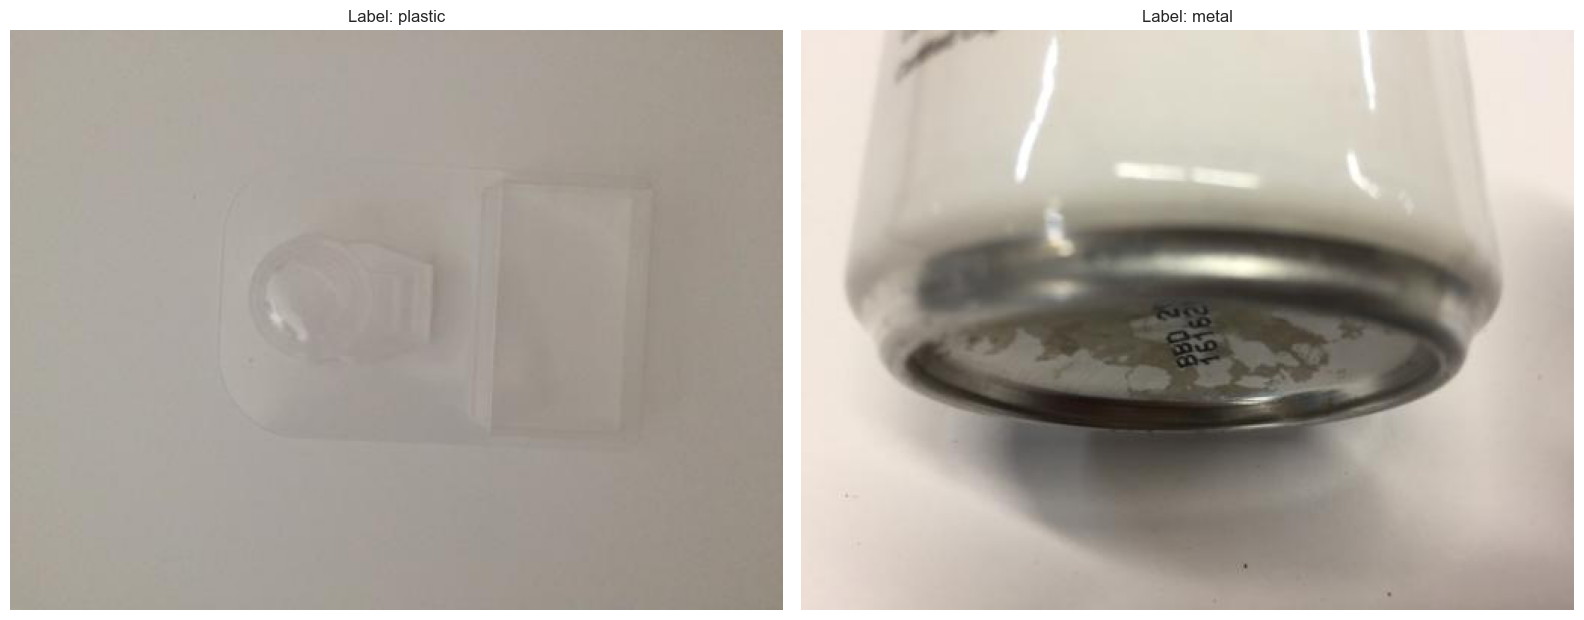

In [10]:
def display_images_with_labels(df, idx, display_count=1, image_size=(8, 8)):
    """
    Displays one or more images with their labels from the dataset.

    Parameters:
        df (DataFrame): The DataFrame containing image paths and labels.
        idx (int): Starting index for the image to display.
        display_count (int): Number of images to display (default is 1).
        image_size (tuple): Size of the displayed image (width, height).
    """
    # Determine whether to display a single image or multiple
    is_single_image = display_count == 1

    # Create a subplot based on the display count
    fig, axes = plt.subplots(1, display_count, figsize=(image_size[0] * display_count, image_size[1]))

    # Ensure axes is always iterable, even for a single image
    axes = [axes] if is_single_image else axes

    # Loop through the images to display
    for i in range(display_count):
        row = df.iloc[idx + i]  # Get the row for the current image
        image_path = row['path']
        image_label = row['type_trash']

        # Read and display the image
        img = mpimg.imread(image_path)
        axes[i].imshow(img)

        # Set the title and remove the axes for a cleaner look
        axes[i].set_title(f'Label: {image_label}', fontsize=12)
        axes[i].axis('off')

    # Automatically adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the image(s)
    plt.show()

# Example usage: Display 3 images starting from index 1040
display_images_with_labels(data, 1040, display_count=2)


---

### Summary
In this section, we prepared, modified, and explored our dataset, ensuring all classes are balanced for effective training of our garbage classification model. The next steps will involve building and training the model using the prepared data.


# <div style="text-align: center; color: #4A90E2;">Model Building and Evaluation of Vision Transformer with ResNet Backbone</div>

This document outlines the process of building a hybrid model that combines Vision Transformer (ViT) architecture with ResNet50 as a backbone for image classification in waste management. We will cover preprocessing, model configurations, training processes, and evaluation methods comprehensively.

## 📦 Import Libraries
To get started, we need to import the necessary libraries that will assist us in building the model, preprocessing data, and evaluating the results.

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split

## ⚙️ Configuration Settings
Set up the essential configuration parameters for our model.

In [2]:
# Configurations
BATCH_SIZE = 16
IMG_SIZE = (224, 224)
n_classes = 6

## 🗺️ Data Preprocessing
We will create an image data generator to augment the dataset and prepare it for training.

### 🖼️ Image Data Generator

In [3]:
# Path to the root directory containing the garbage classification dataset
data_path = '../modified_dataset'
data_classes = os.listdir(data_path)

In [4]:
# ImageDataGenerator with ResNet50-compatible preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Ensures compatibility with ResNet50
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
# Test/validation data generator - only preprocessing, no augmentation
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
# Load full dataset for splitting
full_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
full_data = full_data_gen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Disable shuffle for consistent splitting
)

Found 4650 images belonging to 6 classes.


### 🔄 Splitting Data into Training, Validation, and Test Sets
We will split the dataset into training, validation, and testing datasets for evaluation purposes.

In [7]:
# First split: separate out the test set (10%)
train_val_filenames, test_filenames, train_val_labels, test_labels = train_test_split(
    full_data.filenames, full_data.classes, test_size=0.1, random_state=42, stratify=full_data.classes
)

In [8]:
# Second split: separate the remaining data into training (80%) and validation (10%)
train_filenames, val_filenames, train_labels, val_labels = train_test_split(
    train_val_filenames, train_val_labels, test_size=0.111, random_state=42, stratify=train_val_labels
)

In [9]:
# Map class indices to class names
class_names = list(full_data.class_indices.keys())

In [10]:
# Create DataFrames for training, validation, and testing sets
train_df = pd.DataFrame({"filename": train_filenames, "class": [class_names[i] for i in train_labels]})
val_df = pd.DataFrame({"filename": val_filenames, "class": [class_names[i] for i in val_labels]})
test_df = pd.DataFrame({"filename": test_filenames, "class": [class_names[i] for i in test_labels]})

## 📊 Setting Up Data Generators
Create separate data generators for training, validation, and testing using the previously defined DataFrames.

In [11]:
# Data generators for training, validation, and testing
train_data_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=data_path,
    x_col="filename",
    y_col="class",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True  # Enable shuffle for training
)

Found 3720 validated image filenames belonging to 6 classes.


In [12]:
val_data_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    directory=data_path,
    x_col="filename",
    y_col="class",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False  # Disable shuffle for consistent validation
)

Found 465 validated image filenames belonging to 6 classes.


In [13]:
test_data_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    directory=data_path,
    x_col="filename",
    y_col="class",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False  # Disable shuffle for consistent evaluation
)

Found 465 validated image filenames belonging to 6 classes.


In [14]:
# Count the number of images per class in each set
train_counts = train_df['class'].value_counts()
val_counts = val_df['class'].value_counts()
test_counts = test_df['class'].value_counts()

In [15]:
print("Jumlah gambar per kelas di Training Set:")
print(train_counts)

print("\nJumlah gambar per kelas di Validation Set:")
print(val_counts)

print("\nJumlah gambar per kelas di Testing Set:")
print(test_counts)

print("\nTotal jumlah gambar per kelas (Training + Validation + Testing):")
total_counts = train_counts.add(val_counts, fill_value=0).add(test_counts, fill_value=0)
print(total_counts)

Jumlah gambar per kelas di Training Set:
class
organic    620
plastic    620
glass      620
battery    620
metal      620
paper      620
Name: count, dtype: int64

Jumlah gambar per kelas di Validation Set:
class
battery    78
plastic    78
glass      78
organic    77
paper      77
metal      77
Name: count, dtype: int64

Jumlah gambar per kelas di Testing Set:
class
paper      78
metal      78
organic    78
glass      77
battery    77
plastic    77
Name: count, dtype: int64

Total jumlah gambar per kelas (Training + Validation + Testing):
class
battery    775
glass      775
metal      775
organic    775
paper      775
plastic    775
Name: count, dtype: int64


## 🦾 Vision Transformer Hybrid Architecture with ResNet Backbone
The Vision Transformer Hybrid architecture incorporates ResNet50 for feature extraction, combined with a Transformer Encoder to capture spatial relationships in the data.

### 🛠️ Model Parameters

In [16]:
d_model = 192         # Dimension of embedding (length of embedding vector for each patch)
n_heads = 6           # Number of heads in Multi-Head Attention
d_ff = 768            # Size of hidden layer in Feed-Forward Network (FFN) in Transformer Encoder
dropout_rate = 0.15   # Dropout rate in Transformer Encoder
n_layers = 4          # Number of layers in Transformer Encoder
mlp_head_size = 192   # Size of hidden layer in MLP for classification head
patch_size = 1        # Patch size, each patch is 1x1 from the output of ResNet backbone

### 🔑 Custom Layers for Vision Transformer
We'll define the custom layers necessary for the architecture.

In [17]:
# Custom patching layer
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size

    def get_config(self):
        config = {"patch_size": self.patch_size}

        base_config = super(Patches, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Custom patch + class embedding layer
class PatchClassEmbedding(layers.Layer):
    def __init__(self, d_model, num_patches):
        super(PatchClassEmbedding, self).__init__()
        self.d_model = d_model
        self.num_patches = num_patches

    def build(self, input_shape):
        self.class_token = self.add_weight(
            name="class_token",
            shape=[1, 1, self.d_model],
            initializer="zeros",
            trainable=True,
        )
        self.position_embedding = self.add_weight(
            name="position_embedding",
            shape=[1, self.num_patches + 1, self.d_model],
            initializer="zeros",
            trainable=True,
        )

    def call(self, x):
        batch_size = tf.shape(x)[0]
        class_token = tf.broadcast_to(self.class_token, [batch_size, 1, self.d_model])
        x = tf.concat([class_token, x], axis=1)
        return x + self.position_embedding

    def get_config(self):
        return {"d_model": self.d_model, "num_patches": self.num_patches}

### ✨ Transformer Encoder Block
Define the Transformer Encoder block to process embeddings.

In [18]:
# Transformer Encoder Block
def TransformerEncoder(d_model, n_heads, d_ff, dropout, n_layers):
    inputs = layers.Input(shape=(None, d_model))
    x = inputs
    for _ in range(n_layers):
        attention_output = layers.MultiHeadAttention(num_heads=n_heads, key_dim=d_model, dropout=dropout)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attention_output)
        
        # Feed-Forward Network
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn_output)
        
    return models.Model(inputs, x, name="TransformerEncoder")

### 🏗️ Final Model Architecture
Utilize ResNet50 as the backbone and add transformer layers to complete the model.


In [19]:
# Vision Transformer with ResNet50 as backbone
def build_vit_resnet_model():
    inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    backbone = ResNet50(include_top=False, input_shape=IMG_SIZE + (3,), weights="imagenet")
    
    # Fine-tune the ResNet backbone: Unfreeze the last few layers
    for layer in backbone.layers[-10:]:
        layer.trainable = True

    # Apply backbone
    x = backbone(inputs)
    
    backbone_shape = x.shape
    
    # Patch Creation
    x = Patches(patch_size)(x)   
    
    # Linear Projection of Flattened Patches
    x = tf.keras.layers.Dense(d_model)(x)
    
    # Position Embedding + Extra learnable class embedding
    n_patches = (backbone_shape[1]//patch_size)**2
    x = PatchClassEmbedding(d_model, n_patches)(x)

    # Transformer Encoder
    transformer = TransformerEncoder(d_model, n_heads, d_ff, dropout_rate, n_layers)
    x = transformer(x)

    # Classification Head
    x = layers.Lambda(lambda x: x[:, 0])(x)  # Use class token
    x = layers.Dense(mlp_head_size, activation="relu")(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    return models.Model(inputs, outputs)

## ✏️ Model Compilation
Instantiate and compile the model for training.

In [20]:
# Instantiate and compile the model
vit_model = build_vit_resnet_model()

In [21]:
vit_model.compile(
    optimizer=optimizers.Adam(
        learning_rate=1e-5
    ),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## 📈 Model Summary
Display the architectural summary for the defined model.

In [22]:
vit_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 patches (Patches)           (None, None, 2048)        0         
                                                                 
 dense (Dense)               (None, None, 192)         393408    
                                                                 
 patch_class_embedding (Patc  (None, 50, 192)          9792      
 hClassEmbedding)                                                
                                                                 
 TransformerEncoder (Functio  (None, None, 192)        4740096   
 nal)                                                        

## ⚙️ Callbacks for Training
Set up callbacks to optimize training performance and prevent overfitting.

In [23]:
# Set up callbacks for training
checkpoint_cb = ModelCheckpoint(
    "vit_hybrid_resnet_u10_final.h5",
    save_best_only=True,
    monitor="val_loss",  # Now monitoring validation loss (from validation set, not test set)
    mode="min",
    verbose=1
)

early_stopping_cb = EarlyStopping(
    patience=10,              
    restore_best_weights=True,
    monitor="val_loss",  # Using validation loss for early stopping
)

reduce_lr_cb = ReduceLROnPlateau(
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    monitor="val_loss",  # Using validation loss for reducing learning rate
)

## 🚀 Training the Model
Train the model using the prepared training and validation data.

In [24]:
history = vit_model.fit(
    train_data_generator,
    validation_data=val_data_generator, # Now from validation set, not test set)
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
)

Epoch 1/100
233/233 [==============================] - ETA: 0s - loss: 0.7370 - accuracy: 0.7532
Epoch 1: val_loss improved from inf to 0.28611, saving model to vit_hybrid_resnet_u10_final.h5
233/233 [==============================] - 109s 349ms/step - loss: 0.7370 - accuracy: 0.7532 - val_loss: 0.2861 - val_accuracy: 0.9183 - lr: 1.0000e-05
Epoch 2/100
233/233 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8960
Epoch 2: val_loss improved from 0.28611 to 0.20666, saving model to vit_hybrid_resnet_u10_final.h5
233/233 [==============================] - 76s 324ms/step - loss: 0.3181 - accuracy: 0.8960 - val_loss: 0.2067 - val_accuracy: 0.9355 - lr: 1.0000e-05
Epoch 3/100
233/233 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9250
Epoch 3: val_loss improved from 0.20666 to 0.16457, saving model to vit_hybrid_resnet_u10_final.h5
233/233 [==============================] - 75s 319ms/step - loss: 0.2303 - accuracy: 0.9250 - val_loss: 0.1646 - 

233/233 [==============================] - 74s 315ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0816 - val_accuracy: 0.9785 - lr: 5.0000e-06
Epoch 27/100
233/233 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9957
Epoch 27: val_loss did not improve from 0.07846
233/233 [==============================] - 76s 324ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0991 - val_accuracy: 0.9742 - lr: 5.0000e-06
Epoch 28/100
233/233 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9917
Epoch 28: val_loss did not improve from 0.07846
233/233 [==============================] - 73s 314ms/step - loss: 0.0227 - accuracy: 0.9917 - val_loss: 0.1136 - val_accuracy: 0.9742 - lr: 5.0000e-06
Epoch 29/100
233/233 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9941
Epoch 29: val_loss did not improve from 0.07846
233/233 [==============================] - 74s 316ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.093

## 📊 Model Evaluation
Evaluate the model's performance based on validation data.

In [25]:
# Final evaluation on test set
test_loss, test_acc = vit_model.evaluate(test_data_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

30/30 [==============================] - 3s 82ms/step - loss: 0.0579 - accuracy: 0.9828
Test Loss: 0.05794499069452286, Test Accuracy: 0.9827957153320312


## 📉 Visualization of Training History
Plot graphs to visualize training accuracy and loss over epochs.

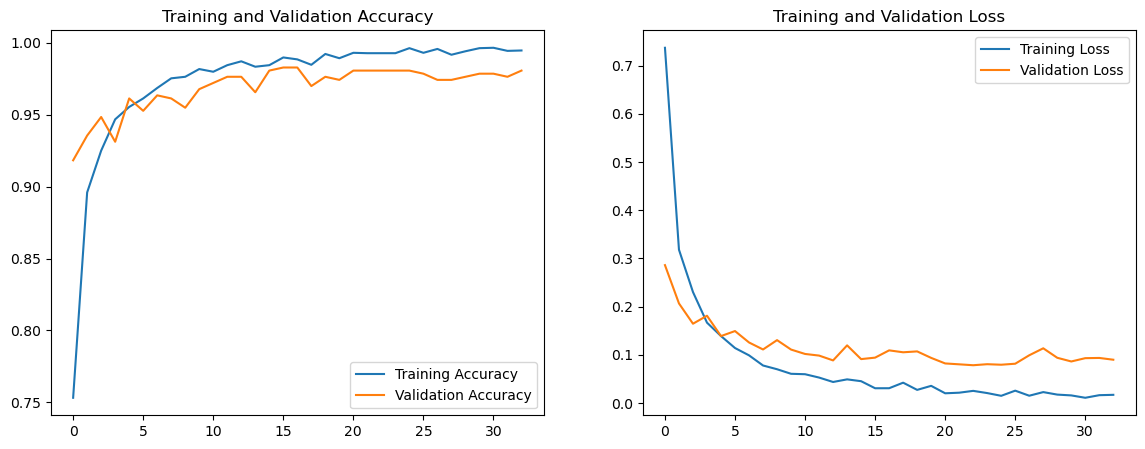

In [26]:
# Plot Training and Validation Loss and Accuracy
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(14, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

## 📊 Confusion Matrix and Classification Report
Evaluate model predictions with a confusion matrix and detailed classification report.

30/30 [==============================] - 5s 79ms/step


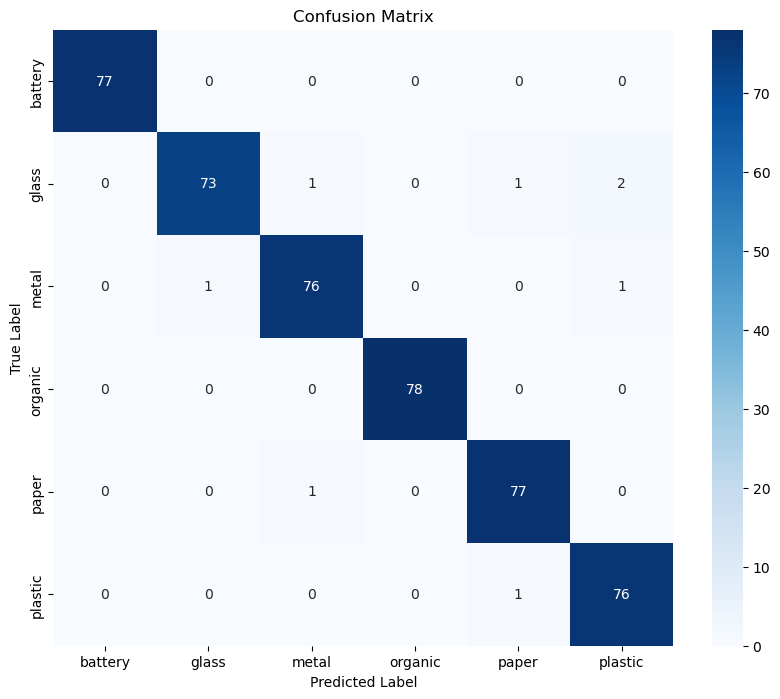

Classification Report:

              precision    recall  f1-score   support

     battery       1.00      1.00      1.00        77
       glass       0.99      0.95      0.97        77
       metal       0.97      0.97      0.97        78
     organic       1.00      1.00      1.00        78
       paper       0.97      0.99      0.98        78
     plastic       0.96      0.99      0.97        77

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



In [27]:
# Predicting and Evaluating the Model
def plot_confusion_matrix_and_report(model, test_generator):
    # Get true labels and predictions
    true_labels = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification report
    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=class_labels))

plot_confusion_matrix_and_report(vit_model, test_data_generator)

## 🧪 Testing the Model
Finally, test the model with some waste images to predict their categories.

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Function to preprocess a single image
def preprocess_new_image(image_path, target_size=(224, 224)):
    """
    Preprocess a single image for prediction.
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size to resize the image (default: (224, 224)).

    Returns:
        np.ndarray: Preprocessed image ready for prediction.
    """
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # ResNet50-compatible preprocessing
    return img_array

# Function to predict a single image
def predict_new_image(model, image_path, class_names, target_size=(224, 224)):
    """
    Predict the class of a new image using a trained model.
    Args:
        model (tf.keras.Model): Trained model.
        image_path (str): Path to the image file.
        class_names (list): List of class names corresponding to model output.
        target_size (tuple): Target size to resize the image (default: (224, 224)).

    Returns:
        str: Predicted class label.
        float: Confidence score of the prediction.
    """
    preprocessed_image = preprocess_new_image(image_path, target_size=target_size)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    return class_names[predicted_class], confidence

# Visualize the image and prediction
def visualize_prediction(image_path, predicted_label, confidence):
    """
    Display the image with its predicted label and confidence.
    Args:
        image_path (str): Path to the image file.
        predicted_label (str): Predicted class label.
        confidence (float): Confidence score of the prediction.
    """
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f})")
    plt.show()

1/1 [==============================] - 3s 3s/step


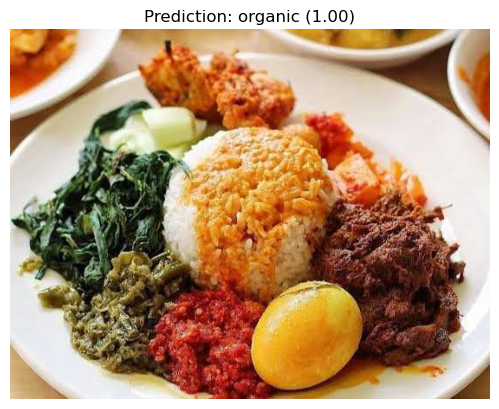

In [29]:
# Example usage
image_path = "testing/naspad.jpeg"  # Replace with the path to your test image
predicted_label, confidence = predict_new_image(vit_model, image_path, class_names)
visualize_prediction(image_path, predicted_label, confidence)

1/1 [==============================] - 0s 97ms/step


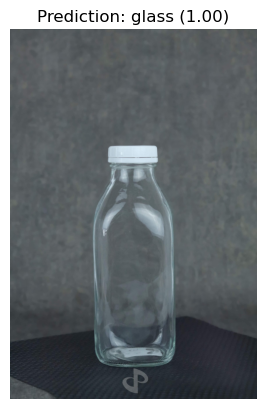

In [30]:
# Example usage
image_path = "testing/botolkaca.jpg"  # Replace with the path to your test image
predicted_label, confidence = predict_new_image(vit_model, image_path, class_names)
visualize_prediction(image_path, predicted_label, confidence)

1/1 [==============================] - 0s 116ms/step


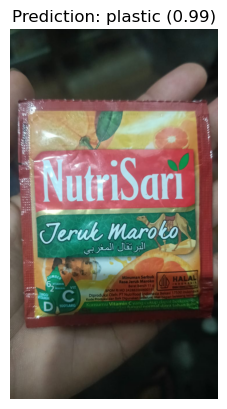

In [32]:
# Example usage
image_path = "testing/nutri sari.jpg"  # Replace with the path to your test image
predicted_label, confidence = predict_new_image(vit_model, image_path, class_names)
visualize_prediction(image_path, predicted_label, confidence)

1/1 [==============================] - 0s 171ms/step


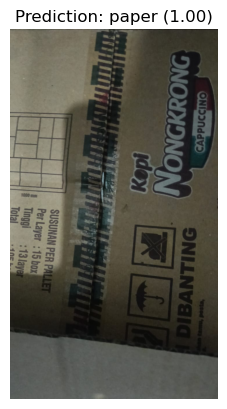

In [33]:
# Example usage
image_path = "testing/karton kede.jpg"  # Replace with the path to your test image
predicted_label, confidence = predict_new_image(vit_model, image_path, class_names)
visualize_prediction(image_path, predicted_label, confidence)

# <div style="text-align: center; color: #4A90E2;">Visualization of Misclassified Images</div>

## 🔍 Misclassification Analysis
After training and testing our waste classification model, it's essential to analyze its performance beyond traditional accuracy metrics. Visualizing misclassified images allows us to gain insights into the model's weaknesses, guiding future improvements.

### 📉 Why Analyze Misclassifications?
By examining a selection of misclassified images, we can identify specific classes that the model confuses with one another. This visualization can reveal patterns in errors that might suggest areas for model refinement, data augmentation, or adjustments in the training process.

In [34]:
# Extract test data for predictions
X_test, y_test = [], []

for images, labels in test_data_generator:
    X_test.append(images)
    y_test.append(labels)
    if len(X_test) * test_data_generator.batch_size >= test_data_generator.samples:
        break

X_test = np.vstack(X_test)
y_test = np.vstack(y_test)
y_test = np.argmax(y_test, axis=1)  # Convert one-hot to class index

# Make predictions
y_pred_logits = vit_model.predict(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)

15/15 [==============================] - 2s 85ms/step


In [35]:
def plot_misclassified_images(X_test, y_pred, y_test, class_names, n_cols=3, figsize=(15, 10)):
    """
    Plot images that were misclassified by the model in a grid layout.

    Parameters:
    - X_test: Array of test images
    - y_pred: Predicted labels from the model
    - y_test: True labels for the test images
    - class_names: List of class names corresponding to label indices
    - n_cols: Number of columns for the image grid
    - figsize: Size of the figure; ensures output fits well in the display window
    """
    # Identify indices of misclassified images
    misclassified_indices = np.where(y_pred != y_test)[0]
    
    # Limit to a maximum of 10 misclassified images
    num_images = min(len(misclassified_indices), 10)
    
    # Calculate number of rows needed
    n_rows = (num_images + n_cols - 1) // n_cols  # Ceiling division to get number of rows
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    for ax, index in zip(axes, misclassified_indices[:num_images]):
        ax.imshow(X_test[index])
        ax.axis('off')  # Hide axis
        ax.set_title(f"True: {class_names[y_test[index]]}\nPred: {class_names[y_pred[index]]}",
                     color="red" if y_pred[index] != y_test[index] else "green")

    # Hide any unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


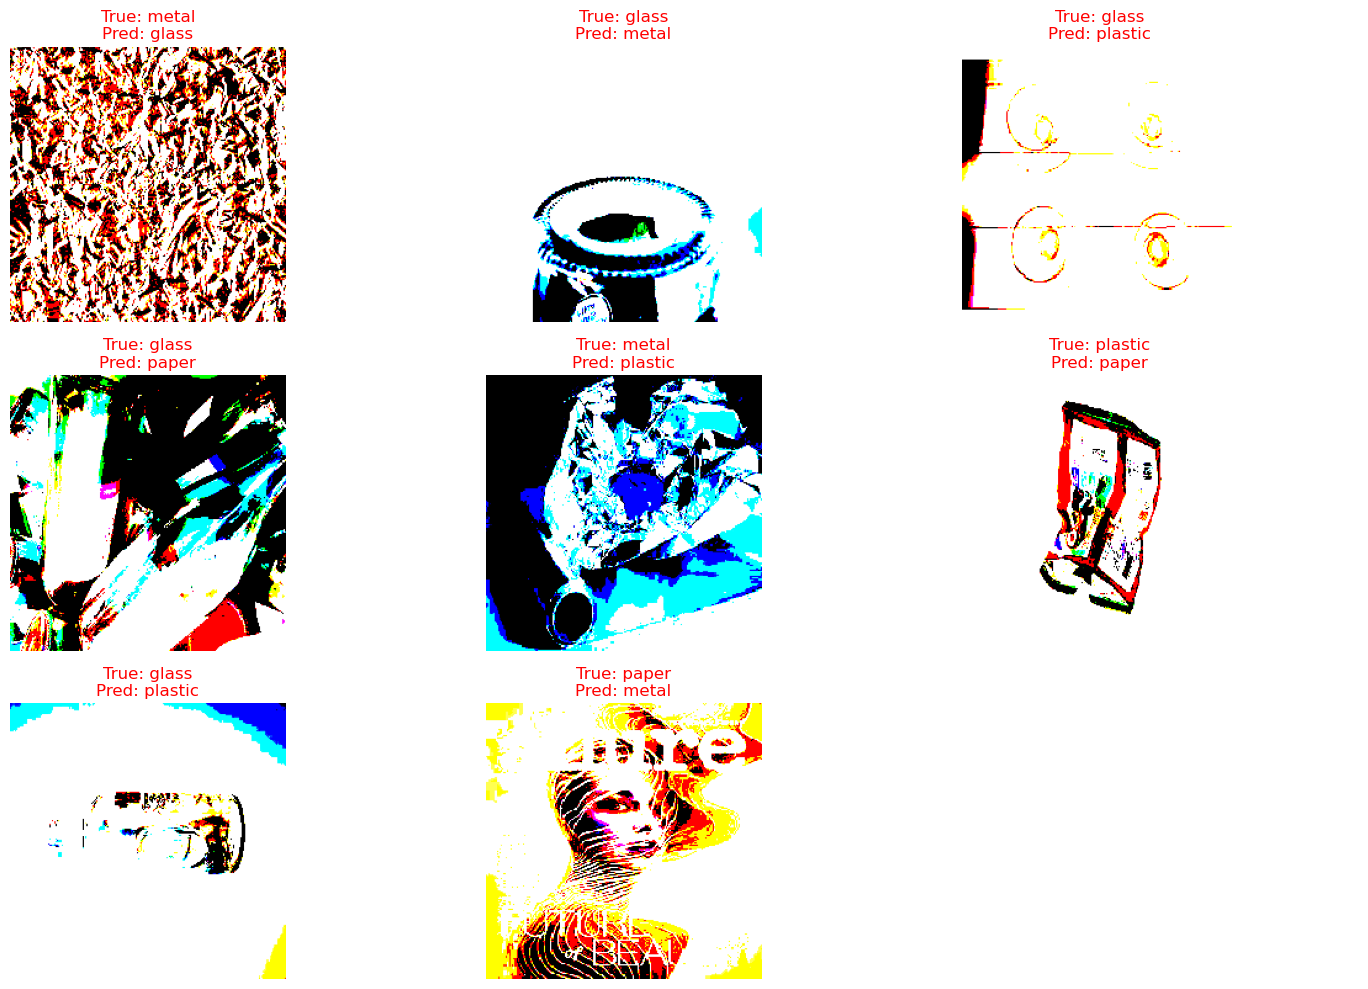

In [36]:
# Call to visualize the misclassified images in a more balanced layout
plot_misclassified_images(X_test, y_pred, y_test, class_names, n_cols=3, figsize=(15, 10))